In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from itertools import cycle
colors = cycle(sns.color_palette())

In [3]:
halo = True
mass_cut = 10**(13.0)

In [4]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [5]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [6]:
cat.load(1.0, HOD='redMagic')

1.0


In [7]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'sigma_logM': 0.46}

In [8]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [9]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [10]:
cat.model.mock.halo_table = cat.model.mock.halo_table[cat.model.mock.halo_table['halo_mvir'] > mass_cut]

In [11]:
print float(sum(cat.halocat.halo_table['halo_upid']==-1))/len(cat.halocat.halo_table['halo_upid'])

0.870805939325


In [12]:
print sum(cat.halocat.halo_table['halo_mvir']> mass_cut)

28197


In [13]:
sizes_400 = cat.halocat.halo_table['halo_rvir'][cat.halocat.halo_table['halo_mvir']> mass_cut]

In [14]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'sigma_logM': 0.46}

In [15]:
cat.calc_number_density(halo)

0.00041703125

In [16]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [17]:
wp = cat.calc_wp(rp_bins, pi_max, halo=halo)

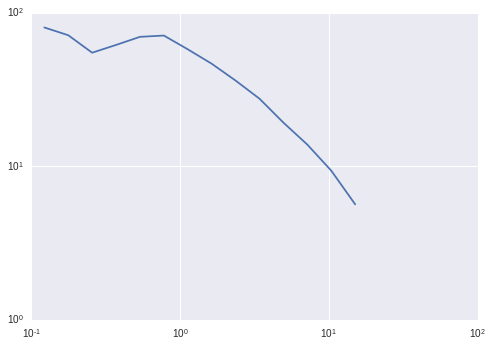

In [18]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [19]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987, 7.29722764, \
           10.24533859,  14.38449888,  20.1958975 , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2

In [20]:
#%%timeit
#try another estimator?
xi = cat.calc_xi(rbins,do_jackknife=False, halo=halo)

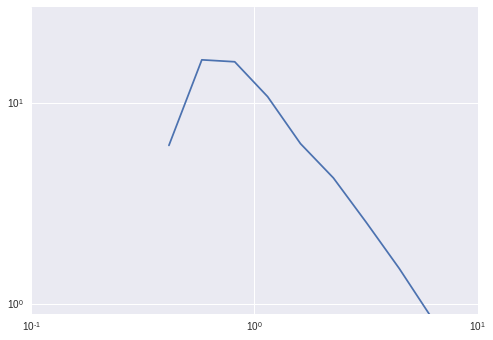

In [21]:
plt.plot(rpoints,xi)
plt.loglog()
plt.xlim([0.1, 10])
plt.ylim([0.9, 30])
plt.show()

In [22]:
cosmo_params = {'simname':'chinchilla', 'Lbox':1050.0, 'scale_factors':[1.0]}

In [23]:
big_cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [24]:
big_cat.filenames = ['/u/ki/swmclau2/des/chinchilla1050/new_out_9.list']

In [25]:
big_cat.load(1.0, HOD='redMagic')

1.0


In [26]:
print big_cat.filenames

['/u/ki/swmclau2/des/chinchilla1050/new_out_9.list']


In [27]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
big_cat.populate(hod_params)

In [28]:
big_cat.model.mock.halo_table = big_cat.model.mock.halo_table[big_cat.model.mock.halo_table['halo_mvir'] > mass_cut]

In [29]:
print float(sum(big_cat.halocat.halo_table['halo_upid']==-1))/len(big_cat.halocat.halo_table['halo_upid'])

0.894247487597


In [30]:
print sum(big_cat.halocat.halo_table['halo_mvir']> mass_cut)

568724


In [31]:
sizes_1050 = big_cat.halocat.halo_table['halo_rvir'][big_cat.halocat.halo_table['halo_mvir']> mass_cut]

In [32]:
big_cat.calc_number_density(halo)

0.0004572344239283015

In [33]:
big_wp = big_cat.calc_wp(rp_bins, pi_max, halo=halo)

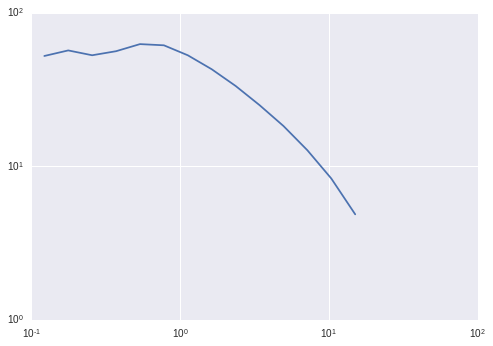

In [34]:
plt.plot(rp_points, big_wp)
plt.loglog()
plt.show()

In [35]:
#%%timeit
#try another estimator?
big_xi = big_cat.calc_xi(rbins,do_jackknife=False, halo=halo)

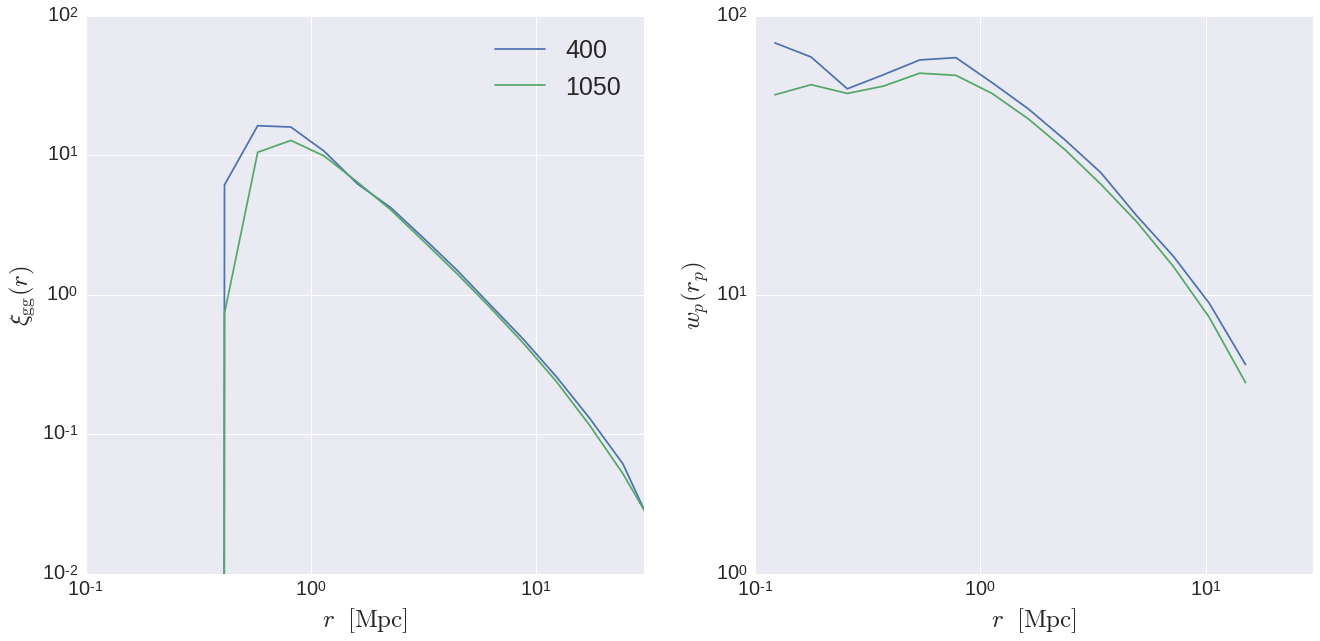

In [36]:
fig = plt.figure(figsize = (22, 10))
for label, c, x, w in zip(['400', '1050'], colors, [xi,big_xi], [wp, big_wp]):
    plt.subplot(121)
    plt.plot(rpoints, x, label = label, color = c )
    
    plt.subplot(122)
    plt.plot(rp_points, w, color = c)
    
plt.subplot(121)
plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 10**-2, ymax = 10**2)
#plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r) $', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.subplot(122)
plt.xlim(xmin = 0.1, xmax = 30)    
plt.ylim(ymin = 10**0, ymax = 10**2)
#plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$ w_p(r_p) $', fontsize=25)
#plt.legend(loc='best', fontsize=25)

plt.show()

/u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


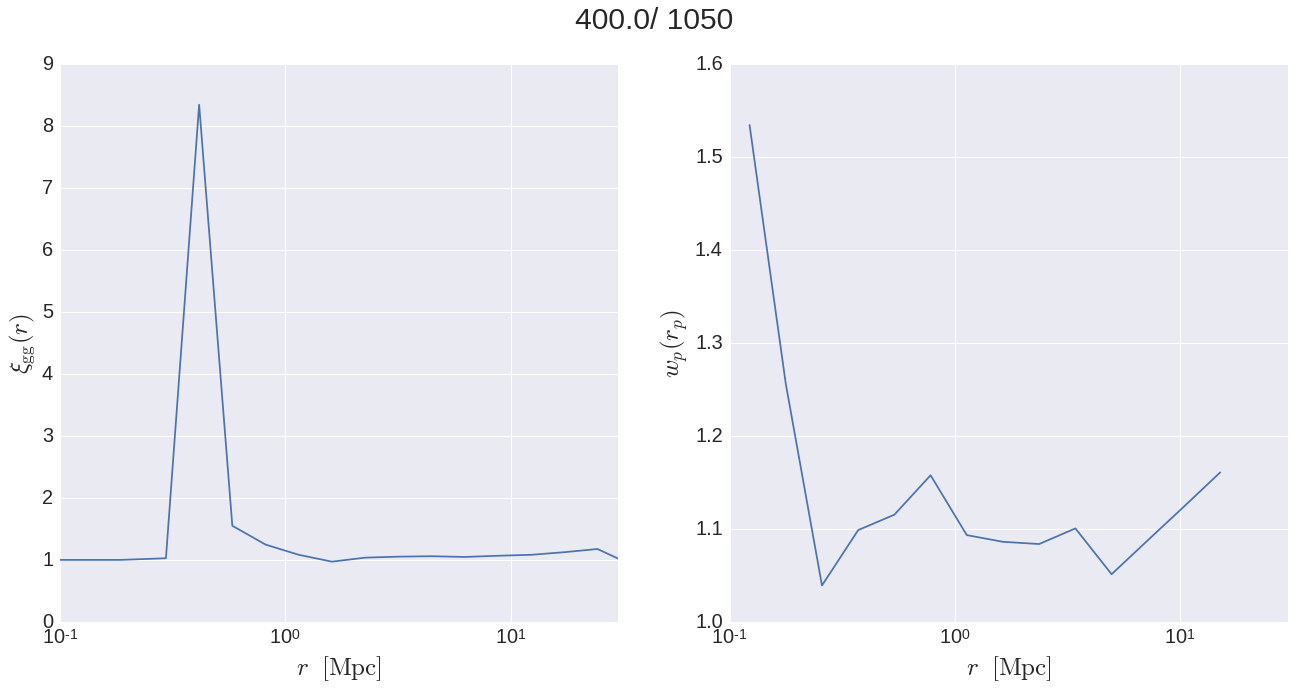

In [37]:
fig = plt.figure(figsize = (22, 10))
plt.subplot(121)
plt.plot(rpoints, xi/big_xi)

plt.subplot(122)
plt.plot(rp_points, wp/big_wp)
    
plt.subplot(121)
plt.xlim(xmin = 0.1, xmax = 30)    
#plt.ylim(ymin = 10**-2, ymax = 10**2)
#plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
#plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r) $', fontsize=25)
plt.legend(loc='best', fontsize=25)

plt.subplot(122)
plt.xlim(xmin = 0.1, xmax = 30)    
#plt.ylim(ymin = 10**0, ymax = 10**2)
#plt.title("OR Emulator w.r.t. %s"%y_param, fontsize =20)
#plt.loglog()
plt.xscale('log')
#plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$ w_p(r_p) $', fontsize=25)
#plt.legend(loc='best', fontsize=25)

plt.suptitle('400.0/ 1050', fontsize = 30)

plt.show()

In [38]:
print sizes_400.mean(), sizes_400.std()
print sizes_1050.mean(), sizes_1050.std()

0.604641 0.181267
0.735479 0.229535


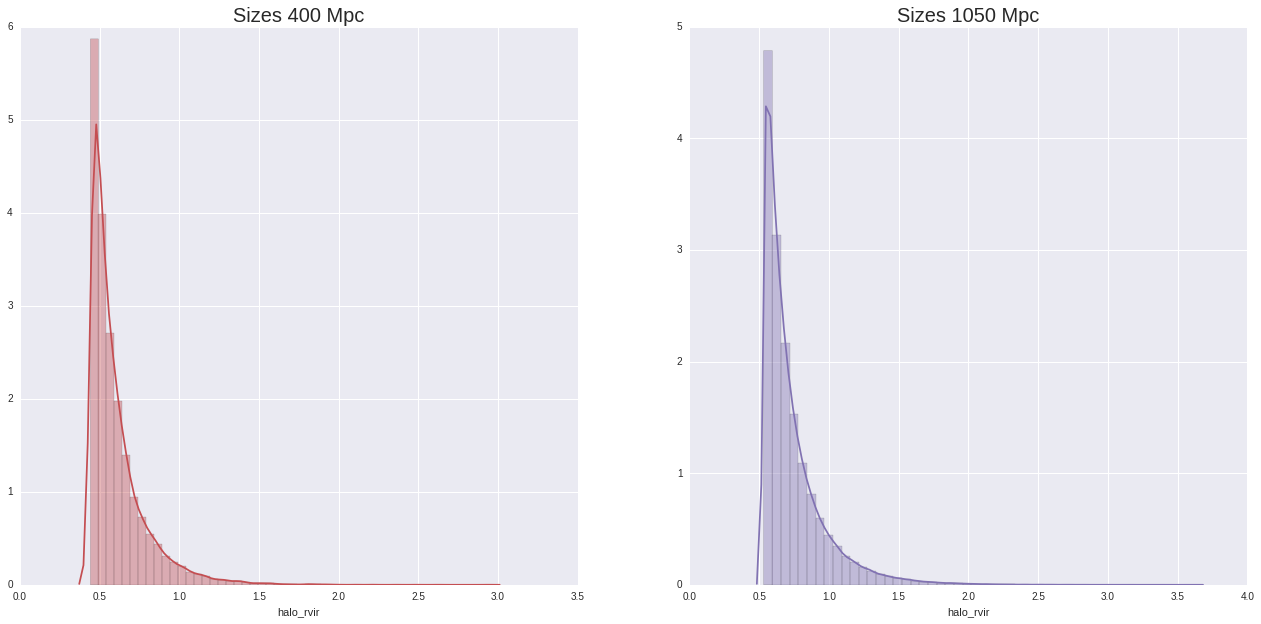

In [39]:
fig = plt.figure(figsize = (22, 10))
plt.subplot(121)
sns.distplot(sizes_400, norm_hist = False, hist=True, kde= True, rug=False, color = colors.next())
plt.title('Sizes 400 Mpc', fontsize = 20)
plt.subplot(122)
sns.distplot(sizes_1050, norm_hist = False, hist=True, kde= True, rug=False, color = colors.next())
plt.title('Sizes 1050 Mpc', fontsize = 20)

In [40]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_mvir']),1e4,  replace=False)
big_rand_idxs = np.random.choice(len(big_cat.halocat.halo_table['halo_mvir']),1e4, replace=False)

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


In [41]:
from astropy.constants import G

In [42]:
G.to('Mpc^3/(kg s^2)')

<Quantity 2.2715596984894245e-78 Mpc3 / (kg s2)>

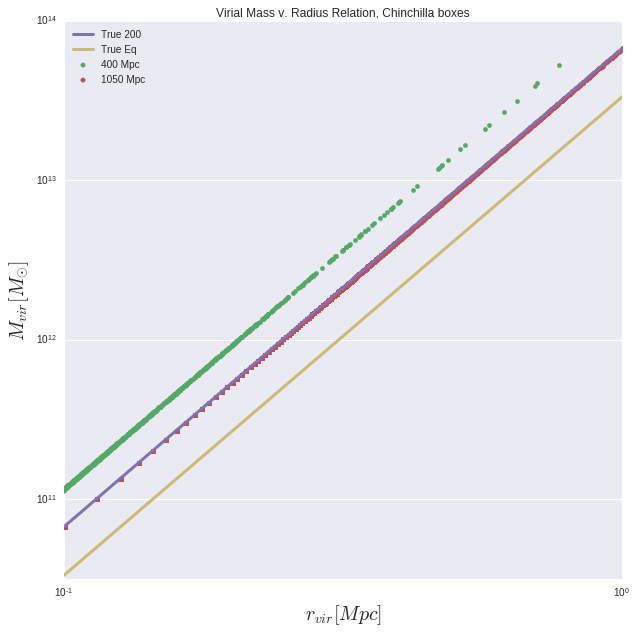

In [48]:
fig = plt.figure(figsize = ((10,10)))
plt.scatter(cat.halocat.halo_table['halo_rvir'][rand_idxs],cat.halocat.halo_table['halo_mvir'][rand_idxs],\
            color = colors.next(), label = '400 Mpc')


plt.scatter( big_cat.halocat.halo_table['halo_rvir'][big_rand_idxs],big_cat.halocat.halo_table['halo_mvir'][big_rand_idxs],\
            color= colors.next(), label = '1050 Mpc')

r_vals = np.linspace(0, 2.0, 100)
m_vals = 1e6*cat.cosmology.Om0/(G.to('Mpc^3/(kg s^2)')*1.96e30)*(r_vals**3)*(3.096e19)**(-2)

plt.plot(r_vals, m_vals, label = "True 200", color = colors.next(), lw = 3)

x = cat.cosmology.Om0-1
m_vals2 = m_vals*(18*np.pi**2+82*x-39*x**2)/200

plt.plot(r_vals, m_vals2, label = "True Eq", color = colors.next(), lw = 3)


plt.yscale('log')
plt.xscale('log')
plt.xlim([.1, 1])
plt.ylim([10**10.5, 10**14])
plt.xlabel(r'$r_{vir}[Mpc]$', fontsize=20)
plt.ylabel(r'$M_{vir} [M_{\odot}]$', fontsize = 20)
plt.title('Virial Mass v. Radius Relation, Chinchilla boxes')
plt.legend(loc='best')

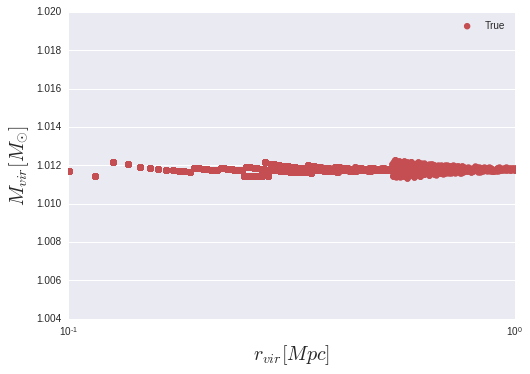

In [44]:
#r_vals = np.linspace(0, 2.0, 100)
m_vals = 1e6*cat.cosmology.Om0/(G.to('Mpc^3/(kg s^2)')*1.96e30)*(big_cat.halocat.halo_table['halo_rvir'][big_rand_idxs]**3)*(3.09e19)**(-2)

plt.scatter(big_cat.halocat.halo_table['halo_rvir'][big_rand_idxs], m_vals/big_cat.halocat.halo_table['halo_mvir'][big_rand_idxs], label = "True", color = colors.next(), lw = 2)


#plt.yscale('log')
plt.xscale('log')
plt.xlim([.1, 1])
#plt.ylim([10**11, 10**13])
plt.xlabel(r'$r_{vir}[Mpc]$', fontsize=20)
plt.ylabel(r'$M_{vir} [M_{\odot}]$', fontsize = 20)
plt.legend(loc='best')

In [45]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo']

In [46]:
cat.model.mock.halo_table.keys()

['halo_upid',
 'halo_x',
 'halo_y',
 'halo_id',
 'halo_z',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rvir',
 'halo_mvir',
 'conc_NFWmodel',
 'halo_num_satellites',
 'halo_num_centrals']